# Tempel  c r50 y r90

In [1]:
df = read.table("../../tempel_limpio_full.dat")
colnames(df) <- c('galID', 'ra_rad', 'dec_rad', 'zCMB', 'rextAB', 'gextAB', 'uextAB',
                  'rabs','gabs','uabs','r50','r90')

In [2]:
head(df,3)

,galID,ra_rad,dec_rad,zCMB,rextAB,gextAB,uextAB,rabs,gabs,uabs,r50,r90
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.237649e+18,4.302659,0.006149179,0.05236439,17.36489,17.82147,18.90977,-18.73781,-18.27942,-17.27946,4.452624,8.327925
2,1.237649e+18,4.309919,0.005996814,0.07266134,16.85341,17.24536,18.35984,-19.98522,-19.58093,-18.55669,2.092882,5.799765
3,1.237649e+18,4.313667,0.007160015,0.16412390,16.27763,17.52155,19.80539,-22.61547,-21.72257,-19.55359,3.012558,9.305360


In [3]:
length(df$galID)

[1] 557559

In [4]:
r5 = df$r50
r9 = df$r90
range(r5)

[1] -99.9000 125.0923

## [ dfbueno ] Seleccion de glx con r50 bien calculado

In [5]:
dfbueno = subset(df, df$r50 >= 1.6)

length(dfbueno$r50)
range(dfbueno$r50)

[1] 469842

[1]   1.600007 125.092300

## [ df1 ] Seleccion de glx con r50 bien calculado + mr<16  

In [6]:
df1 = subset(df, df$r50 > 1.6 & df$rextAB < 16 & df$r90/df$r50 < 5.0)
range(df1$r50)
length(df1$r50)

[1]   1.600076 103.487100

[1] 71246

In [7]:
head(df1,3)

,galID,ra_rad,dec_rad,zCMB,rextAB,gextAB,uextAB,rabs,gabs,uabs,r50,r90
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,1.237649e+18,3.520162,-0.01895346,0.06827128,15.67758,16.55221,18.41877,-21.05556,-20.27490,-18.48057,3.728195,11.653700
11,1.237649e+18,3.547027,-0.02023635,0.01367959,13.99719,14.56983,15.76445,-19.11036,-18.53349,-17.38972,8.449419,17.503450
17,1.237649e+18,3.635346,-0.02130850,0.07400486,15.56765,16.32024,17.84108,-21.33739,-20.67443,-19.19117,3.521352,8.158723


### Bines en Magnitud absoluta  
##### (Tiene que cubir todo el rango de rabs del tempel)

In [8]:
range(df1$rabs)

[1] -24.757484  -8.035603

In [9]:
bin = c(-25.0, -22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19.0, -5.0)
length(bin)

[1] 9

In [10]:
dfm1 = subset(df1, df1$rabs > bin[1] & df1$rabs <= bin[2])
dfm2 = subset(df1, df1$rabs > bin[2] & df1$rabs <= bin[3])
dfm3 = subset(df1, df1$rabs > bin[3] & df1$rabs <= bin[4])
dfm4 = subset(df1, df1$rabs > bin[4] & df1$rabs <= bin[5])
dfm5 = subset(df1, df1$rabs > bin[5] & df1$rabs <= bin[6])
dfm6 = subset(df1, df1$rabs > bin[6] & df1$rabs <= bin[7])
dfm7 = subset(df1, df1$rabs > bin[7] & df1$rabs <= bin[8])
dfm8 = subset(df1, df1$rabs > bin[8] & df1$rabs <= bin[9])

In [11]:
C = df1$r90/df1$r50

c1 = dfm1$r90/dfm1$r50
c2 = dfm2$r90/dfm2$r50
c3 = dfm3$r90/dfm3$r50
c4 = dfm4$r90/dfm4$r50
c5 = dfm5$r90/dfm5$r50
c6 = dfm6$r90/dfm6$r50
c7 = dfm7$r90/dfm7$r50
c8 = dfm8$r90/dfm8$r50

print(c('Glx all range=',length(C)), quote = FALSE)

print(c('Glx bin[]=',length(c1)), quote = FALSE)
print(c('Glx bin[]=',length(c2)), quote = FALSE)
print(c('Glx bin[]=',length(c3)), quote = FALSE)
print(c('Glx bin[]=',length(c4)), quote = FALSE)
print(c('Glx bin[]=',length(c5)), quote = FALSE)
print(c('Glx bin[]=',length(c6)), quote = FALSE)
print(c('Glx bin[]=',length(c7)), quote = FALSE)
print(c('Glx bin[]=',length(c8)), quote = FALSE)

[1] Glx all range= 71246         
[1] Glx bin[]= 5870      
[1] Glx bin[]= 10102     
[1] Glx bin[]= 14364     
[1] Glx bin[]= 13039     
[1] Glx bin[]= 10228     
[1] Glx bin[]= 7235      
[1] Glx bin[]= 4687      
[1] Glx bin[]= 5721      


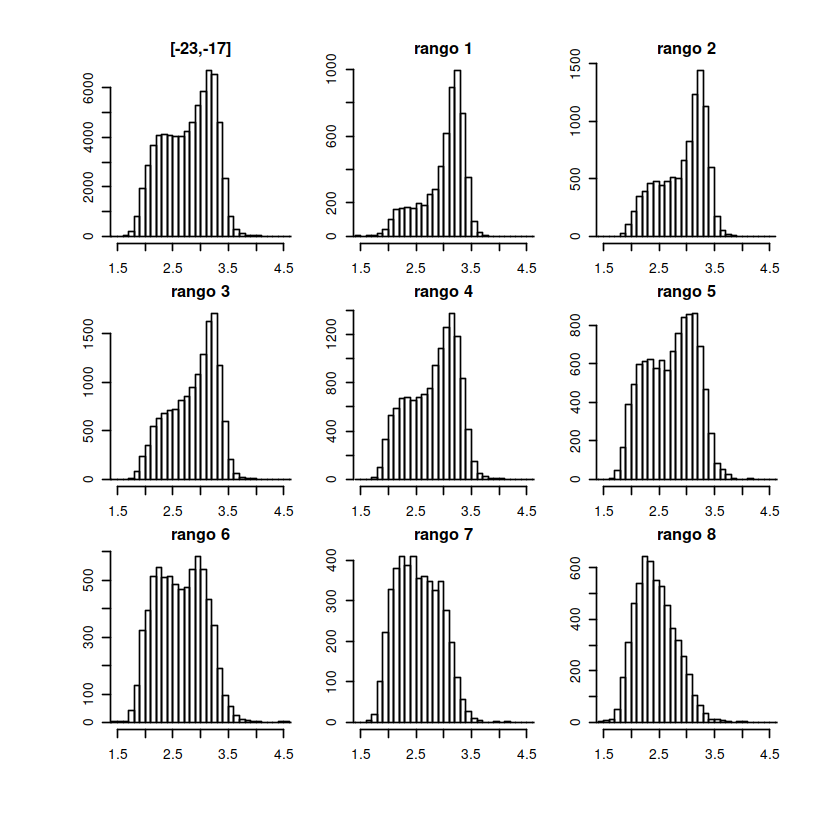

In [12]:
#cairo_ps("xx.eps")
par(mfrow=c(3,3))
par(mar = c(2, 2, 2, 2))
par(oma = c(5, 5, 2, 2))
#par(mar = c(0, 0, 0, 0))
#par(oma = c(5, 6, 2, 2))

limx=c(1.5,4.5)
hist(C, xlim=limx, breaks=30, main='[-23,-17]')

hist(c1, xlim=limx, breaks=30, main='rango 1')
hist(c2, xlim=limx, breaks=30, main='rango 2')
hist(c3, xlim=limx, breaks=30, main='rango 3')
hist(c4, xlim=limx, breaks=30, main='rango 4')
hist(c5, xlim=limx, breaks=30, main='rango 5')
hist(c6, xlim=limx, breaks=30, main='rango 6')
hist(c7, xlim=limx, breaks=30, main='rango 7')
hist(c8, xlim=limx, breaks=30, main='rango 8')

[1] 1.063110 4.981923

[1] 71246

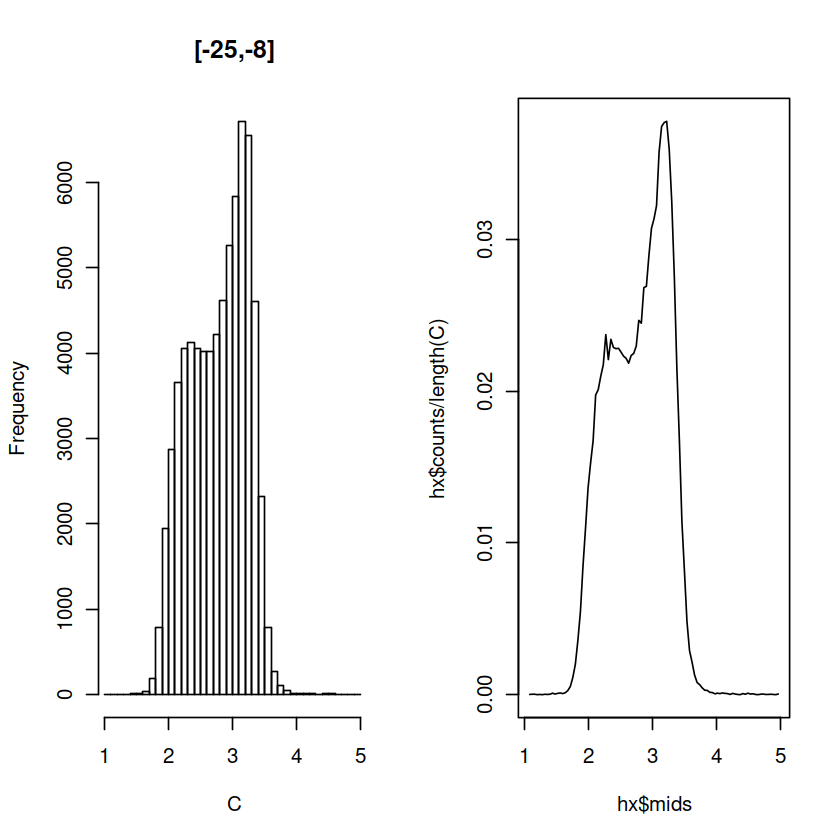

In [13]:
par(mfrow=c(1,2))
#limx=c(1.5,4.5)
limx=c(min(C),max(C))
hist(C, xlim=limx, breaks=50, main='[-25,-8]')
range(C)
br <- seq(min(C), max(C), length = 100)
hx = hist(C,plot=F,breaks=br)
plot(hx$mids,hx$counts/length(C),type='l',xlim=limx)
length(C)

# Calculo la Acumulada

Empirical CDF:	  71246 unique values with summary
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.063   2.403   2.837   2.777   3.155   4.982 

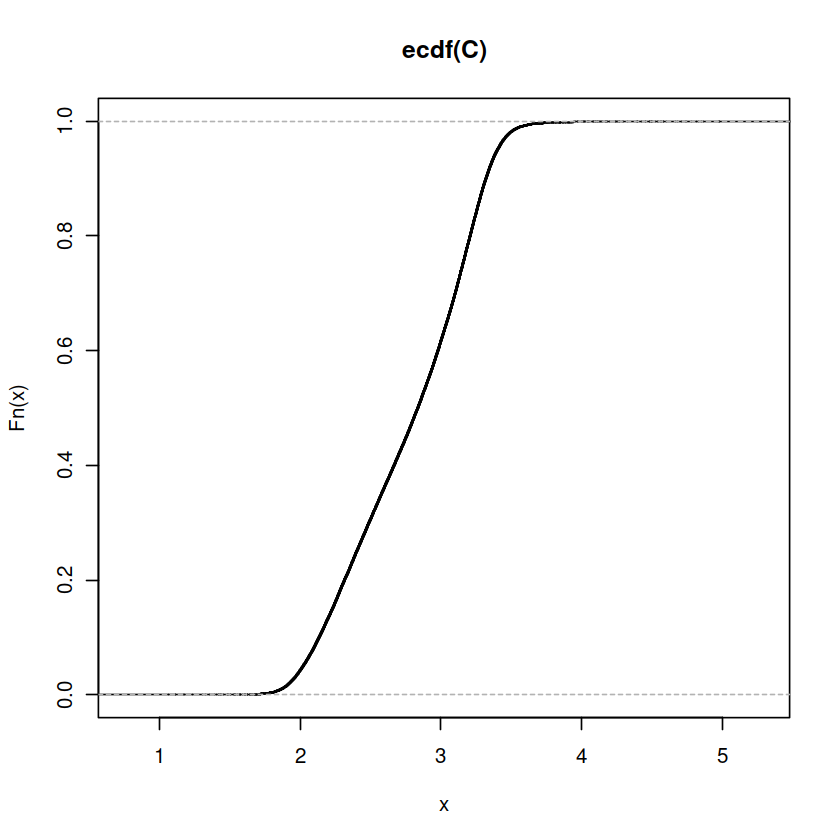

In [14]:
Fn <- ecdf(C)
plot(Fn,ylab="Fn(x)", pch = 19)
summary(Fn)
#plot(C,Fn(C))

### Tabla para tirar aleatorios en [0,1] y sacar un C

In [15]:
df_c = data.frame(C, Fn(C))
head(df_c, 5)

,C,Fn.C.
,<dbl>,<dbl>
1,3.125829,0.72220195
2,2.071557,0.06995480
3,2.316929,0.20040423
4,2.109680,0.08717682
5,2.974762,0.59655279


## Tabla C buenos ( df_c p/ cada bin de mag )

In [16]:
Fn1 <- ecdf(c1)
df_c1 = data.frame(c1, Fn1(c1))
head(df_c1, 2)

Fn2 <- ecdf(c2)
df_c2 = data.frame(c2, Fn2(c2))
#head(df_c2, 2)

Fn3 <- ecdf(c3)
df_c3 = data.frame(c3, Fn3(c3))
#head(df_c3, 2)

Fn4 <- ecdf(c4)
df_c4 = data.frame(c4, Fn4(c4))
#head(df_c4, 2)

Fn5 <- ecdf(c5)
df_c5 = data.frame(c5, Fn5(c5))
#head(df_c5, 2)

Fn6 <- ecdf(c6)
df_c6 = data.frame(c6, Fn6(c6))
#head(df_c6, 2)

Fn7 <- ecdf(c7)
df_c7 = data.frame(c7, Fn7(c7))
#head(df_c7, 2)

Fn8 <- ecdf(c8)
df_c8 = data.frame(c8, Fn8(c8))
#head(df_c8, 2)

,c1,Fn1.c1.
,<dbl>,<dbl>
1,3.249385,0.7102215
2,3.156295,0.5548552


## [ dfmalo ] Seleccion de glx tempel c/ r50 malo

In [17]:
dfmalo = subset(df, df$r50 < 1.6)

Nm = length(dfmalo$r50)
print(Nm)
head(dfmalo,5)

[1] 87717


,galID,ra_rad,dec_rad,zCMB,rextAB,gextAB,uextAB,rabs,gabs,uabs,r50,r90
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,1.237649e+18,3.523255,-0.01835112,0.08732364,17.50251,18.48995,20.36814,-19.80891,-18.96725,-17.14154,1.296098,3.602817
14,1.237649e+18,3.551010,-0.02166187,0.04857951,17.64718,18.06866,19.17621,-18.28660,-17.85262,-16.84377,1.433536,4.034184
16,1.237649e+18,3.623351,-0.02089063,0.07928925,17.54270,18.35945,20.06243,-19.53030,-18.82049,-17.16381,1.291772,3.856141
18,1.237649e+18,3.652285,-0.01953914,0.14824218,16.97055,17.99888,19.86626,-21.61892,-20.84392,-19.02611,1.419872,3.944045
22,1.237649e+18,3.521447,-0.01420114,0.07551352,17.31019,18.05258,19.67716,-19.64450,-18.98701,-17.41379,1.378608,3.359439


##### Seleccionar C random para dfmalo usando df1

In [18]:
#A partir de la rabs de la glx con r50 malo saco un C.
input = dfmalo$rabs

#ist(input)
in0 = subset(dfmalo, input >= min(input) & input <= max(input))
in1 = subset(dfmalo, input >= bin[1] & input <= bin[2])
in2 = subset(dfmalo, input >= bin[2] & input <= bin[3])
in3 = subset(dfmalo, input >= bin[3] & input <= bin[4])
in4 = subset(dfmalo, input >= bin[4] & input <= bin[5])
in5 = subset(dfmalo, input >= bin[5] & input <= bin[6])
in6 = subset(dfmalo, input >= bin[6] & input <= bin[7])
in7 = subset(dfmalo, input >= bin[7] & input <= bin[8])
in8 = subset(dfmalo, input >= bin[8] & input <= bin[9])

print(c('Glx malas all range=',length(input)), quote = FALSE)
range(input)
print(c('Glx malas bin1=',length(in1$rabs)), quote = FALSE)
range(in1$rabs)
print(c('Glx malas bin2=',length(in2$rabs)), quote = FALSE)
range(in2$rabs)
print(c('Glx malas bin3=',length(in3$rabs)), quote = FALSE)
range(in3)
print(c('Glx malas bin4=',length(in4$rabs)), quote = FALSE)
range(in4$rabs)
print(c('Glx malas bin5=',length(in5$rabs)), quote = FALSE)
range(in5$rabs)
print(c('Glx malas bin6=',length(in6$rabs)), quote = FALSE)
range(in6$rabs)
print(c('Glx malas bin7=',length(in7$rabs)), quote = FALSE)
range(in7$rabs)
print(c('Glx malas bin8=',length(in8$rabs)), quote = FALSE)
range(in8$rabs)

[1] Glx malas all range= 87717               


[1] -4.548439e+09 -5.657943e+00

[1] Glx malas bin1= 375            


[1] -23.22197 -22.00045

[1] Glx malas bin2= 5003           


[1] -21.99985 -21.50002

[1] Glx malas bin3= 14436          


[1] -9.990000e+01  1.237675e+18

[1] Glx malas bin4= 20791          


[1] -20.99998 -20.50002

[1] Glx malas bin5= 19913          


[1] -20.49996 -20.00003

[1] Glx malas bin6= 14440          


[1] -19.99995 -19.50003

[1] Glx malas bin7= 7274           


[1] -19.49997 -19.00008

[1] Glx malas bin8= 5484           


[1] -18.999933  -5.657943

### Defino mis 30 seeds

In [19]:
seed = c(46, 56, 170, 27, 80, 90, 99, 101, 2, 3, 17, 19, 32, 30, 27, 301, 406, 408,
         64, 65, 26, 88, 5, 23, 103, 46, 22, 74, 11, 63)

length(seed)

[1] 30

# [ Genero las 30 muestras random de C en todos los bines ] 

### bin1 = [ , ]  |    ( df_c1: tabla buenos )    |    ( in1: malos )
### bin2 = [ , ]  |    ( df_c2: tabla buenos )    |    ( in2: malos )
### ........
### bin8 = [ , ]  |    ( df_c8: tabla buenos )    |    ( in8: malos )

In [20]:
# Matriz dime=(#glx,#seeds)

#------------------------------------------------------------
#---------- BIN 1
#------------------------------------------------------------
C_ran1 = matrix(0,nrow = length(in1$rabs),ncol = length(seed))
for (j in 1:length(seed)){
    set.seed(seed[j])
    x_ran = runif(length(in1$rabs)) #ran [0,1] len=glx in mag range


    for (i in 1:length(in1$rabs)){
        idx = which.min(abs(df_c1$Fn1.c1 - x_ran[i]))
        #print(df_c$Fn.C[idx])
        #print(df_c$Fn.C[idx-1])
        C_ran1[i,j] = df_c1$c1[idx]
        #print(df_c$C[idx-1])
        #print(idx)
        #print(df_c$C[idx])
    }
}

#------------------------------------------------------------
#---------- BIN 2
#------------------------------------------------------------
C_ran2 = matrix(0,nrow = length(in2$rabs),ncol = length(seed))
for (j in 1:length(seed)){
    set.seed(seed[j])
    x_ran = runif(length(in2$rabs)) #ran [0,1] len=glx in mag range

    for (i in 1:length(in2$rabs)){
        idx = which.min(abs(df_c2$Fn2.c2 - x_ran[i]))
        C_ran2[i,j] = df_c2$c2[idx]
    }
}

#------------------------------------------------------------
#---------- BIN 3
#------------------------------------------------------------
C_ran3 = matrix(0,nrow = length(in3$rabs),ncol = length(seed))
for (j in 1:length(seed)){
    set.seed(seed[j])
    x_ran = runif(length(in3$rabs)) #ran [0,1] len=glx in mag range

    for (i in 1:length(in3$rabs)){
        idx = which.min(abs(df_c3$Fn3.c3 - x_ran[i]))
        C_ran3[i,j] = df_c3$c3[idx]
    }
}

#------------------------------------------------------------
#---------- BIN 4
#------------------------------------------------------------
C_ran4 = matrix(0,nrow = length(in4$rabs),ncol = length(seed))
for (j in 1:length(seed)){
    set.seed(seed[j])
    x_ran = runif(length(in4$rabs)) #ran [0,1] len=glx in mag range

    for (i in 1:length(in4$rabs)){
        idx = which.min(abs(df_c4$Fn4.c4 - x_ran[i]))
        C_ran4[i,j] = df_c4$c4[idx]
    }
}

#------------------------------------------------------------
#---------- BIN 5
#------------------------------------------------------------
C_ran5 = matrix(0,nrow = length(in5$rabs),ncol = length(seed))
for (j in 1:length(seed)){
    set.seed(seed[j])
    x_ran = runif(length(in5$rabs)) #ran [0,1] len=glx in mag range

    for (i in 1:length(in5$rabs)){
        idx = which.min(abs(df_c5$Fn5.c5 - x_ran[i]))
        C_ran5[i,j] = df_c5$c5[idx]
    }
}

#------------------------------------------------------------
#---------- BIN 6
#------------------------------------------------------------
C_ran6 = matrix(0,nrow = length(in6$rabs),ncol = length(seed))
for (j in 1:length(seed)){
    set.seed(seed[j])
    x_ran = runif(length(in6$rabs)) #ran [0,1] len=glx in mag range

    for (i in 1:length(in6$rabs)){
        idx = which.min(abs(df_c6$Fn6.c6 - x_ran[i]))
        C_ran6[i,j] = df_c6$c6[idx]
    }
}

#------------------------------------------------------------
#---------- BIN 7
#------------------------------------------------------------
C_ran7 = matrix(0,nrow = length(in7$rabs),ncol = length(seed))
for (j in 1:length(seed)){
    set.seed(seed[j])
    x_ran = runif(length(in7$rabs)) #ran [0,1] len=glx in mag range

    for (i in 1:length(in7$rabs)){
        idx = which.min(abs(df_c7$Fn7.c7 - x_ran[i]))
        C_ran7[i,j] = df_c7$c7[idx]
    }
}

#------------------------------------------------------------
#---------- BIN 8
#------------------------------------------------------------
C_ran8 = matrix(0,nrow = length(in8$rabs),ncol = length(seed))
for (j in 1:length(seed)){
    set.seed(seed[j])
    x_ran = runif(length(in8$rabs)) #ran [0,1] len=glx in mag range

    for (i in 1:length(in8$rabs)){
        idx = which.min(abs(df_c8$Fn8.c8 - x_ran[i]))
        C_ran8[i,j] = df_c8$c8[idx]
    }
}

In [21]:
head(C_ran1,2)
range(C_ran1)
range(C_ran2)
range(C_ran3)
range(C_ran4)
range(C_ran5)
range(C_ran6)
range(C_ran7)
range(C_ran8)

2.626404,3.036012,3.523489,3.478403,3.072805,3.140429,3.175655,3.005038,2.628676,2.579550,⋯,2.037510,3.043748,2.681214,3.170764,2.730145,2.626404,2.915374,3.245390,2.861040,3.384899
2.790688,3.256749,2.768882,2.298278,3.160670,3.366432,2.401892,2.164981,3.244291,3.309593,⋯,2.886363,2.369885,3.232912,2.749143,2.229662,2.790688,3.101719,3.106397,1.484211,2.678807


[1] 1.389543 4.976293

[1] 1.063110 4.562378

[1] 1.309621 4.742598

[1] 1.420901 4.974485

[1] 1.111935 4.830758

[1] 1.171615 4.854496

[1] 1.330263 4.866455

[1] 1.237674 4.814859

### Ejemplo 30 muestras random [bin1]

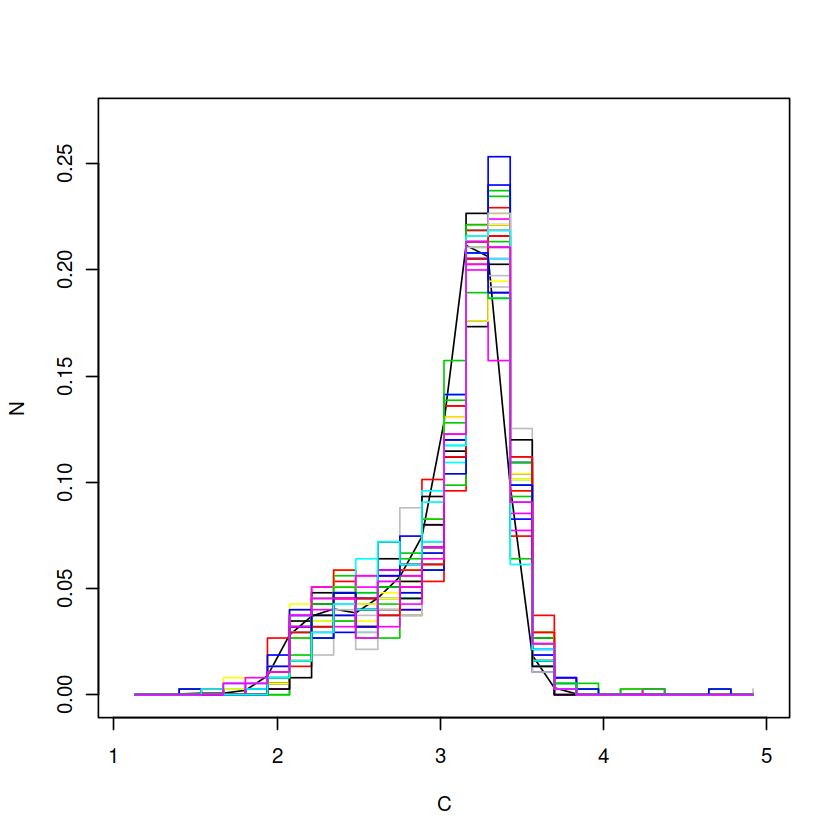

In [22]:
limx=c(min(C),max(C))
br <- seq(min(C), max(C), length = 30)

#C buenos
hc1 = hist(c1,plot=F,breaks=br)
sample_buena = hc1$counts/length(c1)
plot(hc1$mids,sample_buena,type='l',xlim=limx,ylim=c(0,0.27),xlab='C',ylab='N')

#hc1$mids y hr1$mids son los mismos
for (i in 1:length(seed)){
    hr1 = hist(C_ran1[,i],plot=F,breaks=br)
    sample_i = hr1$counts/length(C_ran1[,i])
    points(hr1$mids,sample_i,type='s',xlim=limx,col=i)
}

# Test KS para las 30 muestras random contra la buena 

## p-value para cada muestra para c/ bin

In [23]:
#limites comunes
limx=c(min(C),max(C))
br <- seq(min(C), max(C), length = 30)
#hc1$mids y hr1$mids son los mismos
#--------------------------------------------------------------

hc = hist(c1,plot=F,breaks=br)
sample_buena = hc$counts/length(c1)

pval1=c()
for (i in 1:length(seed)){
    hr = hist(C_ran1[,i],plot=F,breaks=br)
    sample_i = hr$counts/length(C_ran1[,i])

    pval1[i] = ks.test(sample_buena,sample_i)$p.value
}
#--------------------------------------------------------------

hc = hist(c2,plot=F,breaks=br)
sample_buena = hc$counts/length(c2)

pval2=c()
for (i in 1:length(seed)){
    hr = hist(C_ran2[,i],plot=F,breaks=br)
    sample_i = hr$counts/length(C_ran2[,i])

    pval2[i] = ks.test(sample_buena,sample_i)$p.value

}
#--------------------------------------------------------------

hc = hist(c3,plot=F,breaks=br)
sample_buena = hc$counts/length(c3)

pval3=c()
for (i in 1:length(seed)){
    hr = hist(C_ran3[,i],plot=F,breaks=br)
    sample_i = hr$counts/length(C_ran3[,i])

    pval3[i] = ks.test(sample_buena,sample_i)$p.value

}
#--------------------------------------------------------------

hc = hist(c4,plot=F,breaks=br)
sample_buena = hc$counts/length(c4)

pval4=c()
for (i in 1:length(seed)){
    hr = hist(C_ran4[,i],plot=F,breaks=br)
    sample_i = hr$counts/length(C_ran4[,i])

    pval4[i] = ks.test(sample_buena,sample_i)$p.value

}
#--------------------------------------------------------------

hc = hist(c5,plot=F,breaks=br)
sample_buena = hc$counts/length(c5)

pval5=c()
for (i in 1:length(seed)){
    hr = hist(C_ran5[,i],plot=F,breaks=br)
    sample_i = hr$counts/length(C_ran5[,i])

    pval5[i] = ks.test(sample_buena,sample_i)$p.value

}
#--------------------------------------------------------------

hc = hist(c6,plot=F,breaks=br)
sample_buena = hc$counts/length(c6)

pval6=c()
for (i in 1:length(seed)){
    hr = hist(C_ran6[,i],plot=F,breaks=br)
    sample_i = hr$counts/length(C_ran6[,i])

    pval6[i] = ks.test(sample_buena,sample_i)$p.value

}
#--------------------------------------------------------------

hc = hist(c7,plot=F,breaks=br)
sample_buena = hc$counts/length(c7)

pval7=c()
for (i in 1:length(seed)){
    hr = hist(C_ran7[,i],plot=F,breaks=br)
    sample_i = hr$counts/length(C_ran7[,i])

    pval7[i] = ks.test(sample_buena,sample_i)$p.value

}
#--------------------------------------------------------------

hc = hist(c8,plot=F,breaks=br)
sample_buena = hc$counts/length(c8)

pval8=c()
for (i in 1:length(seed)){
    hr = hist(C_ran8[,i],plot=F,breaks=br)
    sample_i = hr$counts/length(C_ran8[,i])

    pval8[i] = ks.test(sample_buena,sample_i)$p.value

}

Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute ex

Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute ex

Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute exact p-value with ties”
Warning message in ks.test(sample_buena, sample_i):
“cannot compute ex

### Ejemplo Plot bin1 c/ p-value maximo y minimo

[1] 0.06359879 0.56405016

[1] "P-value maximo" "Muestra="       "4"             
[1] "P-value maximo"   "0.56405016293634"


[1] 375

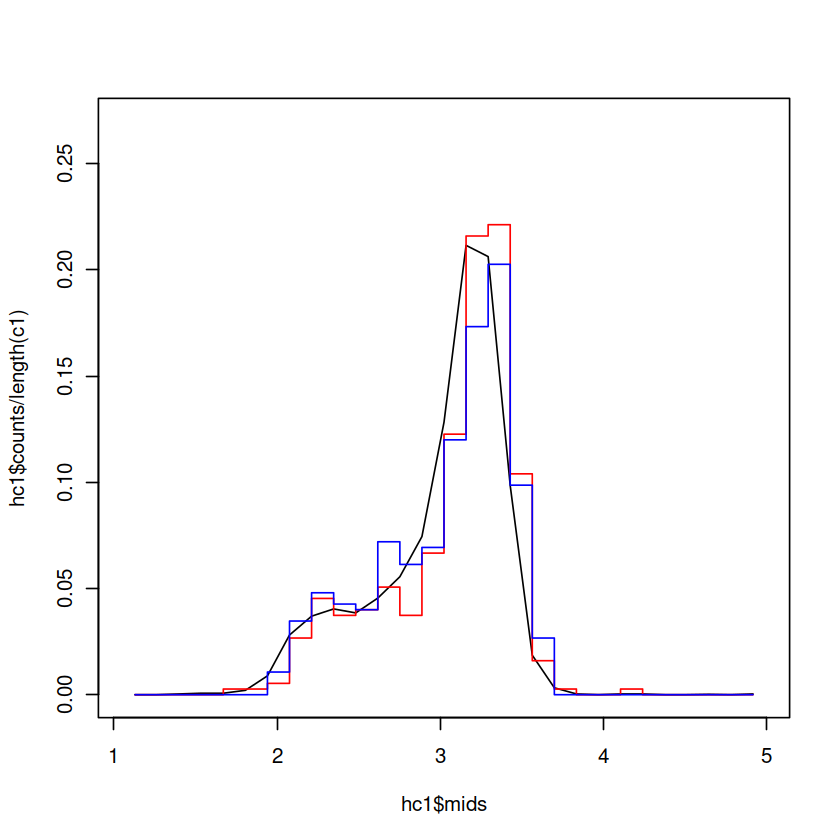

In [24]:
range(pval1)
ind_pmin = which.min(pval1)
#ind_pmin
#pval1[ind_pmin]

ind_pmax = which.max(pval1)
#ind_pmax 
#pval1[ind_pmax]
print(c('P-value maximo','Muestra=',ind_pmax))
print(c('P-value maximo', pval1[ind_pmax]))

#Plot 
plot(hc1$mids,hc1$counts/length(c1),type='l',xlim=limx,ylim=c(0,0.27))

i = ind_pmax
hr1 = hist(C_ran1[,i],plot=F,breaks=br)
sample_i = hr1$counts/length(C_ran1[,i])
points(hr1$mids,sample_i,type='s',xlim=limx,col='red')


i = ind_pmin
hr1 = hist(C_ran1[,i],plot=F,breaks=br)
sample_i = hr1$counts/length(C_ran1[,i])
points(hr1$mids,sample_i,type='s',xlim=limx,col='blue')

length(C_ran1[,i])


### Busco el p-value maximo (para cada bin)

In [25]:
ind_pmax1 = which.max(pval1)
ind_pmax2 = which.max(pval2)
ind_pmax3 = which.max(pval3)
ind_pmax4 = which.max(pval4)
ind_pmax5 = which.max(pval5)
ind_pmax6 = which.max(pval6)
ind_pmax7 = which.max(pval7)
ind_pmax8 = which.max(pval8)

In [26]:
#install.packages("Hmisc")
#install.packages('magicaxis')
library(Hmisc)
library(magicaxis)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




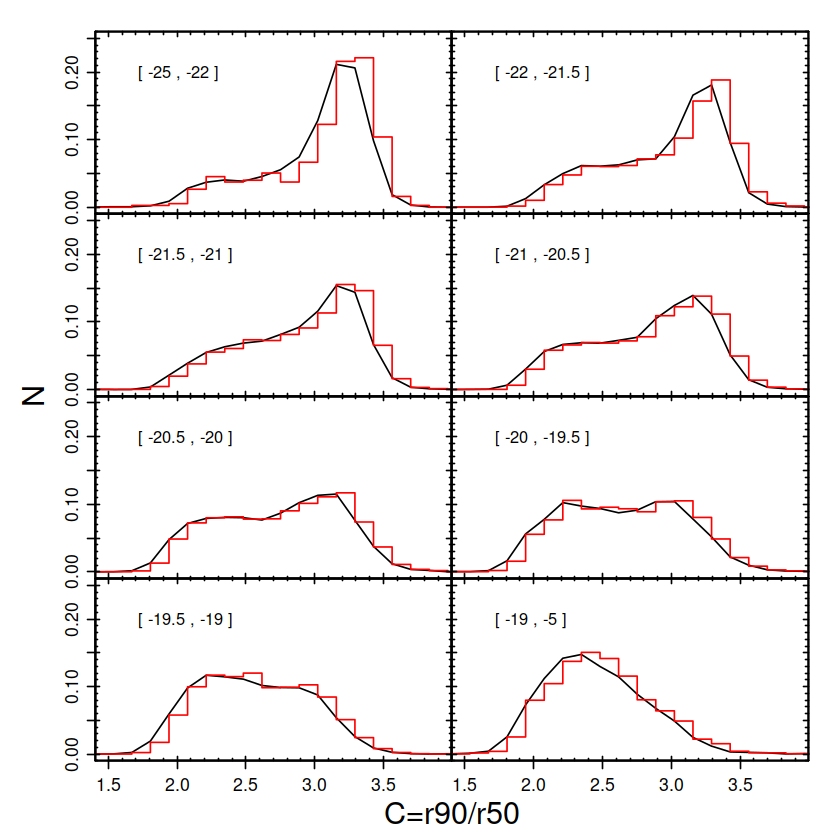

In [27]:
#cairo_ps("xx.eps")
par(mfrow=c(4,2))
#par(mar = c(2, 2, 2, 2))
#par(oma = c(5, 5, 2, 2))
par(mar = c(0, 0, 0, 0))
par(oma = c(5, 6, 2, 2))
limx = c(1.5,3.9)
limy = c(0,0.25)

plot_cparam <- function(xx,Cran,indx,a,bin1,bin2,mark){
       
    hc = hist(xx,plot=F,breaks=br)
    sample_buena = hc$counts/length(xx)
    #plot(hc$mids,sample_buena,type='l',xlim=limx,ylim=limy)

    if(mark==0){plot(hc$mids,sample_buena,type='l',xlab="",xaxt='n',lty=1,xlim=limx,ylim=limy, cex.axis=1.3)}
    if(mark==1){plot(hc$mids,sample_buena,type='l',xlab="",yaxt='n',lty=1,xlim=limx,ylim=limy, cex.axis=1.3)}
    if(mark==2){plot(hc$mids,sample_buena,type='l',xlab="",xaxt='n',yaxt='n',lty=1,xlim=limx,ylim=limy, cex.axis=1.3)}
    if(mark==3){plot(hc$mids,sample_buena,type='l',xlab="",lty=1,xlim=limx,ylim=limy, cex.axis=1.3)}
    
    ii = indx
    hr1 = hist(Cran[,ii],plot=F,breaks=br)
    sample_i = hr1$counts/length(Cran[,ii])
    points(hc1$mids,sample_i,type='s',xlim=limx,col='red')
   
    legend(1.5,0.23, legend=c(a), cex=1.2,bty="n")

    #axis(side=1, tck=-0.01, labels=FALSE)
    #minor.tick(nx=2, ny=2, tick.ratio=0.5, x.args = list(), y.args = list())
    #axis(side=2, tck=-0.01, labels = FALSE)
    #minor.tick(nx=2, ny=2, tick.ratio=0.5, x.args = list(), y.args = list())
    #axis(side=3, tck=-0.01, labels = FALSE)
    #minor.tick(nx=2, ny=2, tick.ratio=0.5, x.args = list(), y.args = list())
    #axis(side=4, tck=-0.01, labels = FALSE)
    #minor.tick(nx=2, ny=2, tick.ratio=0.5, x.args = list(), y.args = list())
    magaxis(1,majorn=5, minorn=5, tcl=0.3, ratio=0.5,labels=FALSE)
    magaxis(2,majorn=5, minorn=5, tcl=0.3, ratio=0.5,labels=FALSE)
    magaxis(3,majorn=5, minorn=5, tcl=0.3, ratio=0.5,labels=FALSE)
    magaxis(4,majorn=5, minorn=5, tcl=0.3, ratio=0.5,labels=FALSE)
}

plot_cparam(c1,C_ran1,ind_pmax1,as.character(paste("[",bin[1],",",bin[2],"]")),bin[1],bin[2],0)
plot_cparam(c2,C_ran2,ind_pmax2,as.character(paste("[",bin[2],",",bin[3],"]")),bin[2],bin[3],2)
plot_cparam(c3,C_ran3,ind_pmax3,as.character(paste("[",bin[3],",",bin[4],"]")),bin[3],bin[4],0)
plot_cparam(c4,C_ran4,ind_pmax4,as.character(paste("[",bin[4],",",bin[5],"]")),bin[4],bin[5],2)
plot_cparam(c5,C_ran5,ind_pmax5,as.character(paste("[",bin[5],",",bin[6],"]")),bin[5],bin[6],0)
plot_cparam(c6,C_ran6,ind_pmax6,as.character(paste("[",bin[6],",",bin[7],"]")),bin[6],bin[7],2)
plot_cparam(c7,C_ran7,ind_pmax7,as.character(paste("[",bin[7],",",bin[8],"]")),bin[7],bin[8],3)
plot_cparam(c8,C_ran8,ind_pmax8,as.character(paste("[",bin[8],",",bin[9],"]")),bin[8],bin[9],1)


mtext(expression(paste(C,"=r90/r50",)), side = 1, cex = 1.5, line = 3.1, col = "black", outer = TRUE)
mtext(expression(paste("N")), side = 2, cex = 1.5, line = 3.1, col = "black", outer = TRUE)

## Genero mis datafrma para las glx con r50 malos

In [28]:
pc = C_ran1[,ind_pmax] #para que todos tengan el mismo nombre
dfmalos_c1<-cbind(in1,pc) 
head(dfmalos_c1,2)

pc = C_ran2[,ind_pmax]; dfmalos_c2<-cbind(in2,pc)
pc = C_ran3[,ind_pmax]; dfmalos_c3<-cbind(in3,pc)
pc = C_ran4[,ind_pmax]; dfmalos_c4<-cbind(in4,pc)
pc = C_ran5[,ind_pmax]; dfmalos_c5<-cbind(in5,pc)
pc = C_ran6[,ind_pmax]; dfmalos_c6<-cbind(in6,pc)
pc = C_ran7[,ind_pmax]; dfmalos_c7<-cbind(in7,pc)
pc = C_ran8[,ind_pmax]; dfmalos_c8<-cbind(in8,pc)


dfmalos_tot = rbind(dfmalos_c1,dfmalos_c2,dfmalos_c3,dfmalos_c4,dfmalos_c5,dfmalos_c6,dfmalos_c7,dfmalos_c8)
head(dfmalos_tot,2)

,galID,ra_rad,dec_rad,zCMB,rextAB,gextAB,uextAB,rabs,gabs,uabs,r50,r90,pc
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
464,1.237651e+18,4.257244,0.82323437,0.1977132,17.10408,18.38229,20.38948,-22.26300,-21.43412,-19.53095,1.368057,3.876439,3.478403
1547,1.237652e+18,2.777403,0.05501753,0.1530031,16.66721,17.81266,19.82727,-22.02211,-21.18364,-19.22785,1.581174,4.812399,2.298278


,galID,ra_rad,dec_rad,zCMB,rextAB,gextAB,uextAB,rabs,gabs,uabs,r50,r90,pc
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
464,1.237651e+18,4.257244,0.82323437,0.1977132,17.10408,18.38229,20.38948,-22.26300,-21.43412,-19.53095,1.368057,3.876439,3.478403
1547,1.237652e+18,2.777403,0.05501753,0.1530031,16.66721,17.81266,19.82727,-22.02211,-21.18364,-19.22785,1.581174,4.812399,2.298278


###### Glx c/ r50 malo (sumo todos los bines)

In [29]:
tot_malos = length(dfmalos_tot$pc)
tot_malos

[1] 87716

## Genero datafrme y Calculo los "C" con r50 buenos

In [30]:
C_bien = dfbueno$r90/dfbueno$r50
pc = C_bien #para que todos tengan el mismo nombre
dfbueno_c<-cbind(dfbueno,C_bien) 
head(dfbueno_c,2)

,galID,ra_rad,dec_rad,zCMB,rextAB,gextAB,uextAB,rabs,gabs,uabs,r50,r90,C_bien
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.237649e+18,4.302659,0.006149179,0.05236439,17.36489,17.82147,18.90977,-18.73781,-18.27942,-17.27946,4.452624,8.327925,1.870341
2,1.237649e+18,4.309919,0.005996814,0.07266134,16.85341,17.24536,18.35984,-19.98522,-19.58093,-18.55669,2.092882,5.799765,2.771186


###### Glx c/ r50 bueno

In [31]:
length(C_bien)

[1] 469842

In [32]:
length(C_bien)+ tot_malos

[1] 557558

## [ dfgalcg] Seleccion de glx en CG c/ r50 malo

In [33]:
dfgalcg = read.table("../data/tab_gal_gru.dat")
colnames(dfgalcg) <- c('gruID','ngal', 'ra', 'dec', 'zCMB', 'rextAB', 'gextAB', 'uextAB','galID',
                       'r50','r90','rabs','gabs','uabs','pasiva')

In [34]:
head(dfgalcg,3)

,gruID,ngal,ra,dec,zCMB,rextAB,gextAB,uextAB,galID,r50,r90,rabs,gabs,uabs,pasiva
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,1,114.844,45.118,0.079785,14.719,15.661,18.910,1.237664e+18,6.580098,20.917290,-22.38191,-21.56168,-19.65829,1
2,1,2,114.840,45.124,0.077575,16.380,16.885,18.360,1.237664e+18,2.361705,5.640143,-20.61242,-20.12822,-18.97008,0
3,1,3,114.850,45.082,0.078914,16.813,17.693,19.805,1.237664e+18,1.159409,3.226531,-20.25581,-19.49058,-17.69719,1


In [35]:
dfgalcg_malo = subset(dfgalcg, dfgalcg$r50 < 1.6)
totcg_malos = length(dfgalcg_malo$r50)
totcg_malos


[1] 213

In [36]:
tt = cbind(dfmalos_tot$galID, dfmalos_tot$pc)
cc = cbind(dfgalcg_malo$galID, dfgalcg_malo$pc)

write.table(tt, file = "../../tempel_r50_malo.dat",sep='    ', row.names = FALSE)
write.table(cc, file = "../../galcg_r50_malo.dat",sep='    ', row.names = FALSE)

In [37]:
# Enteros grandes
library(gmp)

id_tot = as.bigz(dfmalos_tot$galID)
id_cg = as.bigz(dfgalcg_malo$galID)


Attaching package: ‘gmp’


The following objects are masked from ‘package:base’:

    %*%, apply, crossprod, matrix, tcrossprod




## Unir indice Concentracion de glx c/ r50 malo y bueno  (fortran)

In [38]:
length(dfmalo$r50) + length(dfbueno$r50)

[1] 557559

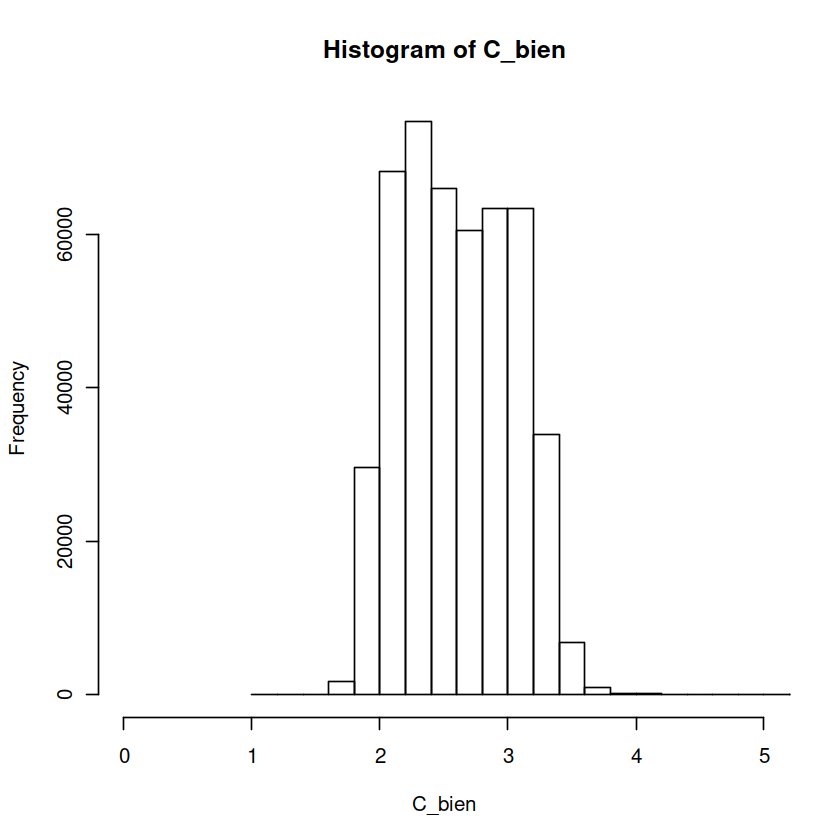

In [39]:
C_bien = dfbueno$r90/dfbueno$r50
hist(C_bien, xlim=c(0,5),breaks=200)

## Test Kolmogorov-Smirnov 
https://search.r-project.org/CRAN/refmans/Ecume/html/ks_test.html


	Two-sample Kolmogorov-Smirnov test

data:  n1 and n2
D = 1, p-value = 4.263e-14
alternative hypothesis: two-sided


D 
1

[1] 4.263256e-14

[1] 4.263256e-14

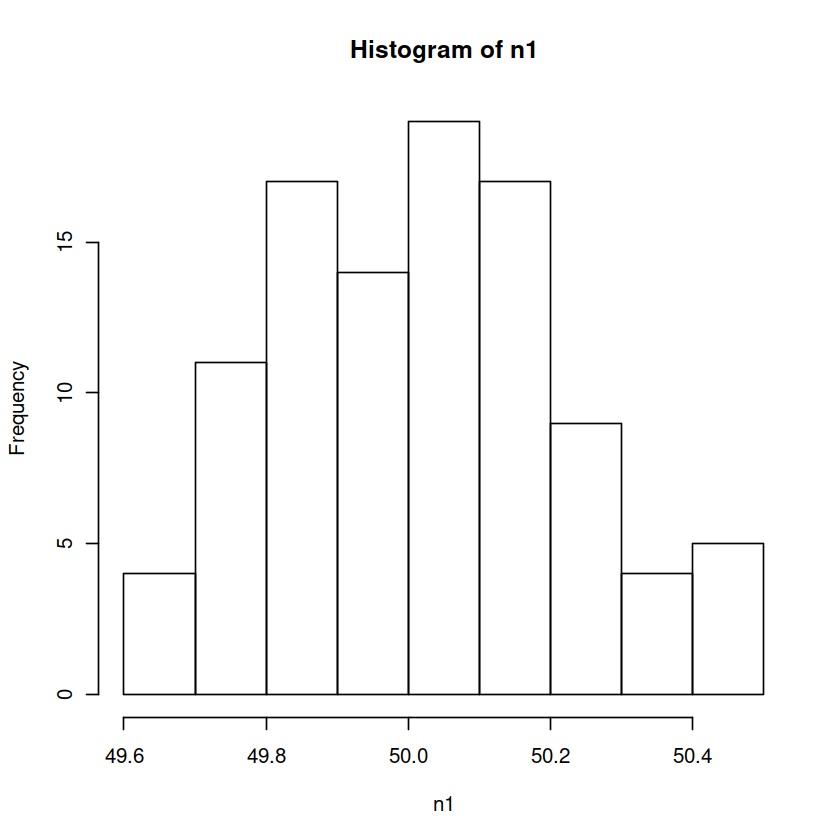

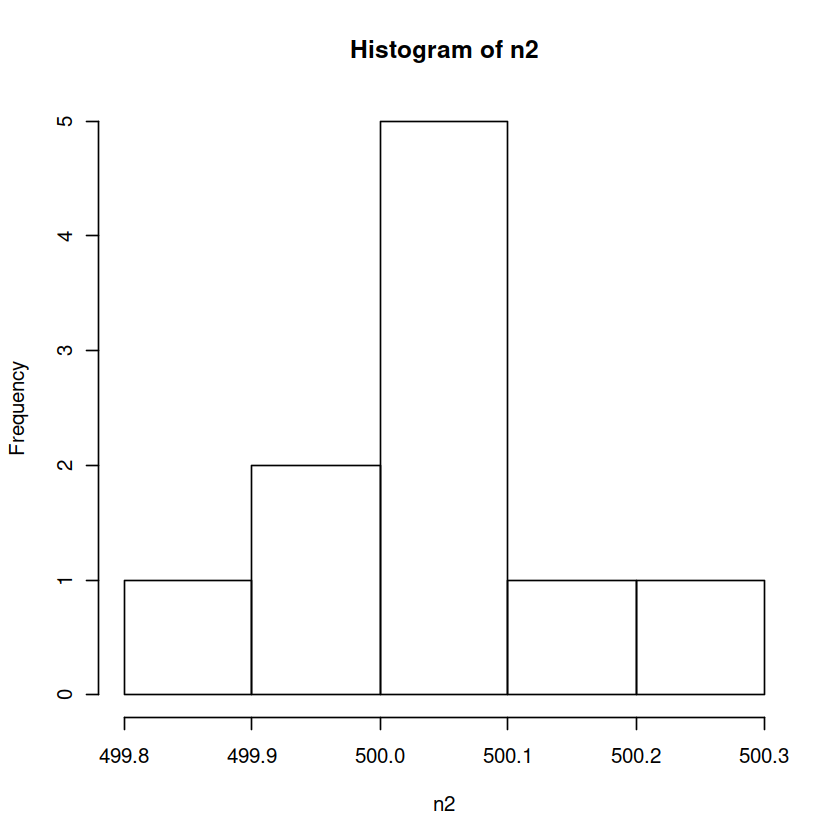

In [40]:
n1 = rnorm(100, 50, 0.2)
n2 = rnorm(10, 500, 0.2)
a=ks.test(n1,n2)
a
#$htest$p.value
a$statistic
a$p.value
pval = ks.test(n1,n2)$p.value
pval
hist(n1)
hist(n2)

# Codigo tirado